In [40]:
#import depencecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [41]:
# Build URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [42]:
# create a set of randomg latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [43]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [44]:
from citipy import citipy

In [45]:
# create a list [] for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

647

In [46]:
# Create an empty list to hold the weather data.
city_data = []
print("Beggining Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beggining Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | opuwo
Processing Record 2 of Set 1 | udimskiy
Processing Record 3 of Set 1 | berlevag
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | patitirion
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | inirida
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | nata
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | marsa matruh
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processin

City not found. Skipping...
Processing Record 40 of Set 4 | mitu
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | north bend
Processing Record 43 of Set 4 | paoua
Processing Record 44 of Set 4 | saraland
Processing Record 45 of Set 4 | tuktoyaktuk
Processing Record 46 of Set 4 | abu samrah
Processing Record 47 of Set 4 | inhambane
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | slave lake
Processing Record 50 of Set 4 | aflu
City not found. Skipping...
Processing Record 1 of Set 5 | big rapids
Processing Record 2 of Set 5 | jacmel
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | deputatskiy
Processing Record 5 of Set 5 | giresun
Processing Record 6 of Set 5 | sola
Processing Record 7 of Set 5 | nalut
Processing Record 8 of Set 5 | chagda
City not found. Skipping...
Processing Record 9 of Set 5 | tazovskiy
Processing Record 10 of Set 5 | iqaluit
Processing Record 11 of Set 5 | muros
Processing Record 12 of Set 5 | nab

Processing Record 32 of Set 8 | kaeo
Processing Record 33 of Set 8 | novotroitskaya
Processing Record 34 of Set 8 | nazas
Processing Record 35 of Set 8 | nurobod
Processing Record 36 of Set 8 | breves
Processing Record 37 of Set 8 | ailigandi
Processing Record 38 of Set 8 | porto novo
Processing Record 39 of Set 8 | nhulunbuy
Processing Record 40 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 8 | longlac
City not found. Skipping...
Processing Record 42 of Set 8 | saint anthony
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | sal rei
Processing Record 45 of Set 8 | padang
Processing Record 46 of Set 8 | laiagam
City not found. Skipping...
Processing Record 47 of Set 8 | mugur-aksy
Processing Record 48 of Set 8 | wilkie
Processing Record 49 of Set 8 | ostrovnoy
Processing Record 50 of Set 8 | chipata
Processing Record 1 of Set 9 | oktyabrskiy
Processing Record 2 of Set 9 | kingsville
Processing Record 3 of Set 9 | north battleford
P

Processing Record 20 of Set 12 | sao gabriel da cachoeira
Processing Record 21 of Set 12 | eucaliptus
Processing Record 22 of Set 12 | hukuntsi
Processing Record 23 of Set 12 | ayan
Processing Record 24 of Set 12 | coihaique
Processing Record 25 of Set 12 | soubre
Processing Record 26 of Set 12 | atima
Processing Record 27 of Set 12 | nantucket
Processing Record 28 of Set 12 | conde
Processing Record 29 of Set 12 | mae sot
Processing Record 30 of Set 12 | sungaipenuh
Processing Record 31 of Set 12 | annau
Processing Record 32 of Set 12 | tatawin
Processing Record 33 of Set 12 | utrera
Processing Record 34 of Set 12 | oranjestad
Processing Record 35 of Set 12 | thanh hoa
Processing Record 36 of Set 12 | esil
Processing Record 37 of Set 12 | west bay
Processing Record 38 of Set 12 | zhanakorgan
Processing Record 39 of Set 12 | charters towers
Processing Record 40 of Set 12 | kampong chhnang
Processing Record 41 of Set 12 | gorontalo
Processing Record 42 of Set 12 | olinda
Processing Reco

In [47]:
# Convert the array into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Opuwo,-18.0607,13.8400,78.12,60,68,3.27,NA,2021-03-19 16:45:38
1,Udimskiy,61.1417,45.9144,20.12,94,100,5.91,RU,2021-03-19 16:45:38
2,Berlevag,70.8578,29.0864,24.80,80,20,41.43,NO,2021-03-19 16:45:39
3,Norman Wells,65.2820,-126.8329,-4.00,77,75,21.85,CA,2021-03-19 16:45:39
4,Patitirion,39.1500,23.8667,51.80,82,75,8.05,GR,2021-03-19 16:45:39
5,Port Elizabeth,-33.9180,25.5701,68.00,73,90,9.22,ZA,2021-03-19 16:45:40
6,Busselton,-33.6500,115.3333,70.66,55,89,6.91,AU,2021-03-19 16:45:40
7,Port Lincoln,-34.7333,135.8667,66.96,77,30,12.30,AU,2021-03-19 16:45:41
8,Inirida,3.8653,-67.9239,91.40,54,90,1.36,CO,2021-03-19 16:45:41
9,Kavaratti,10.5669,72.6420,83.35,71,2,8.28,IN,2021-03-19 16:45:41


In [48]:
# Create new varialbel with correct column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# assign old DF = to old DF[new_varaible]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Opuwo,NA,2021-03-19 16:45:38,-18.0607,13.8400,78.12,60,68,3.27
1,Udimskiy,RU,2021-03-19 16:45:38,61.1417,45.9144,20.12,94,100,5.91
2,Berlevag,NO,2021-03-19 16:45:39,70.8578,29.0864,24.80,80,20,41.43
3,Norman Wells,CA,2021-03-19 16:45:39,65.2820,-126.8329,-4.00,77,75,21.85
4,Patitirion,GR,2021-03-19 16:45:39,39.1500,23.8667,51.80,82,75,8.05
5,Port Elizabeth,ZA,2021-03-19 16:45:40,-33.9180,25.5701,68.00,73,90,9.22
6,Busselton,AU,2021-03-19 16:45:40,-33.6500,115.3333,70.66,55,89,6.91
7,Port Lincoln,AU,2021-03-19 16:45:41,-34.7333,135.8667,66.96,77,30,12.30
8,Inirida,CO,2021-03-19 16:45:41,3.8653,-67.9239,91.40,54,90,1.36
9,Kavaratti,IN,2021-03-19 16:45:41,10.5669,72.6420,83.35,71,2,8.28


In [49]:
# Create an output file as a CSV
output_data_file = "weather_data/cities.csv"
# Export the city_data inot a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [50]:
# Extract relevant fields from the city_data_df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

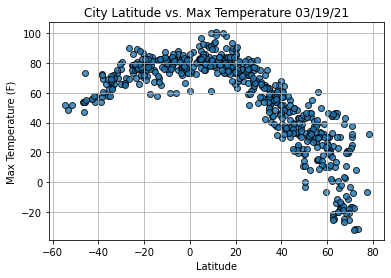

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

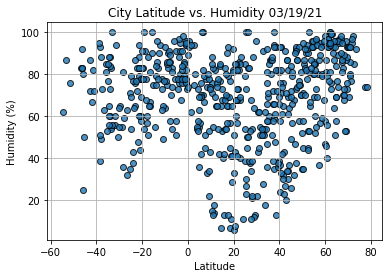

In [52]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

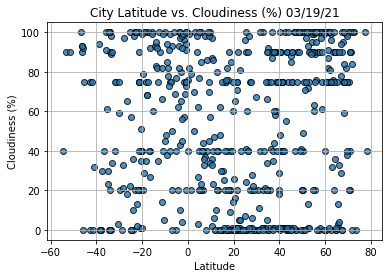

In [53]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

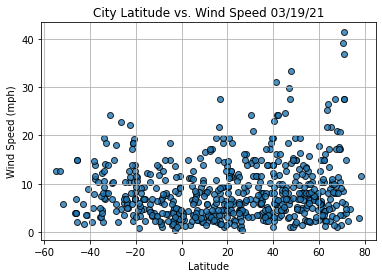

In [54]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [135]:
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope intercept
    regress_values = x_values * slope + intercept
    line_eq = (f"y = {slope:.2f} x + {intercept:.2f}\nr-value = {r_value:.2f}")
    
    # create a scatter plot fo the x and y values
    plt.scatter(x_values, y_values)
    
    #plot the regression line with the x-values and the y coordinates
    #based on the intercept and slope
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates , fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [136]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2021-03-19 16:45:43
Lat                        3.0707
Lng                      172.7902
Max Temp                    80.98
Humidity                       80
Cloudiness                    100
Wind Speed                  11.21
Name: 13, dtype: object

In [137]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
590     True
591     True
592     True
593     True
594     True
Name: Lat, Length: 595, dtype: bool

In [58]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Udimskiy,RU,2021-03-19 16:45:38,61.1417,45.9144,20.12,94,100,5.91
2,Berlevag,NO,2021-03-19 16:45:39,70.8578,29.0864,24.80,80,20,41.43
3,Norman Wells,CA,2021-03-19 16:45:39,65.2820,-126.8329,-4.00,77,75,21.85
4,Patitirion,GR,2021-03-19 16:45:39,39.1500,23.8667,51.80,82,75,8.05
8,Inirida,CO,2021-03-19 16:45:41,3.8653,-67.9239,91.40,54,90,1.36


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

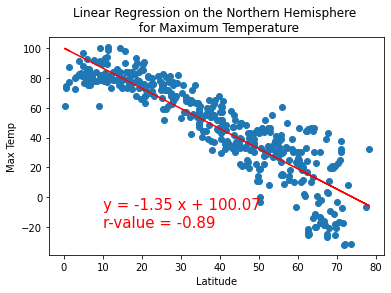

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,-20))


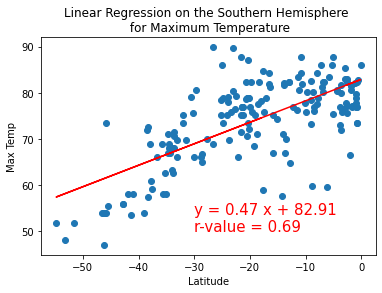

In [139]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-30,50))


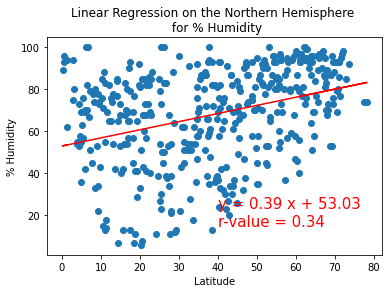

In [140]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (40,15))


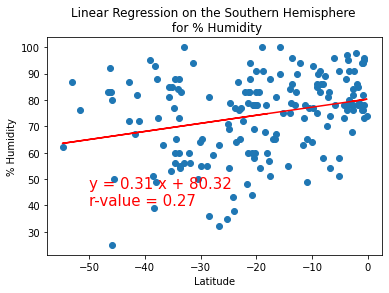

In [141]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50,40))


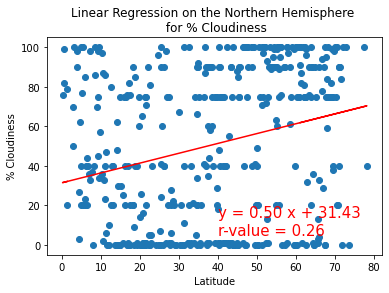

In [142]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (40,5))

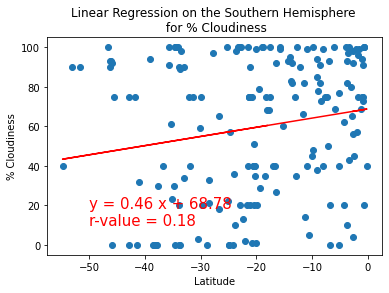

In [143]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-50,10))

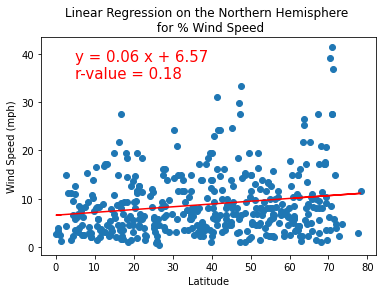

In [144]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed", "Wind Speed (mph)", (5,35))

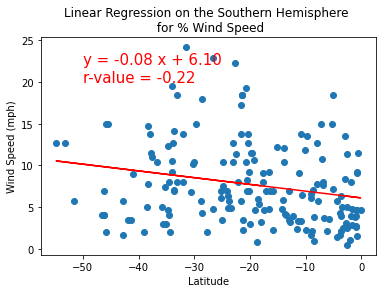

In [145]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed", "Wind Speed (mph)", (-50,20))